In [1]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd




In [2]:
datafile = "splicedDataML/mix6ml"

x_data = pd.read_csv(datafile+"X.csv",names=['s1','s2','s3','s4','s5'])
y_dataR = np.genfromtxt(datafile+"Y.csv",delimiter=',',dtype=int)
num_classes = np.max(y_dataR) + 1
y_data = keras.utils.to_categorical(y_dataR, num_classes)
#x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.20, random_state=0)
x_train = x_data[:880]
x_test = x_data[880:]
y_train = y_data[:880]
y_test = y_data[880:]
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((880, 5), (880, 6), (845, 5), (845, 6))

In [3]:
#defifne a sequentail Model
model = Sequential()
#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=5,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Output layer
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_output = model.fit(x_train,y_train,epochs=150,batch_size=20,verbose=1,validation_data=(x_test,y_test),)
model.save('modelSave')


Epoch 1/150
44/44 [==============================] - 0s 4ms/step - loss: 21.4839 - accuracy: 0.3114 - val_loss: 6.2611 - val_accuracy: 0.3124
Epoch 2/150
44/44 [==============================] - 0s 1ms/step - loss: 10.0744 - accuracy: 0.3284 - val_loss: 2.4095 - val_accuracy: 0.4225
Epoch 3/150
44/44 [==============================] - 0s 2ms/step - loss: 4.8510 - accuracy: 0.3591 - val_loss: 1.1741 - val_accuracy: 0.5763
Epoch 4/150
44/44 [==============================] - 0s 2ms/step - loss: 3.0015 - accuracy: 0.3318 - val_loss: 1.0365 - val_accuracy: 0.3988
Epoch 5/150
44/44 [==============================] - 0s 1ms/step - loss: 1.8245 - accuracy: 0.3182 - val_loss: 1.0663 - val_accuracy: 0.3195
Epoch 6/150
44/44 [==============================] - 0s 1ms/step - loss: 1.3390 - accuracy: 0.3875 - val_loss: 1.0038 - val_accuracy: 0.3148
Epoch 7/150
44/44 [==============================] - 0s 1ms/step - loss: 1.1841 - accuracy: 0.3886 - val_loss: 0.9553 - val_accuracy: 0.3124
Epoch 8/150

Epoch 59/150
44/44 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.7682 - val_loss: 0.4018 - val_accuracy: 0.8201
Epoch 60/150
44/44 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.7773 - val_loss: 0.3936 - val_accuracy: 0.7988
Epoch 61/150
44/44 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.7795 - val_loss: 0.3856 - val_accuracy: 0.8568
Epoch 62/150
44/44 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.7830 - val_loss: 0.3849 - val_accuracy: 0.8414
Epoch 63/150
44/44 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.7852 - val_loss: 0.3756 - val_accuracy: 0.8249
Epoch 64/150
44/44 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.7636 - val_loss: 0.3779 - val_accuracy: 0.8639
Epoch 65/150
44/44 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.7739 - val_loss: 0.3763 - val_accuracy: 0.8651
Epoch 

44/44 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.8943 - val_loss: 0.2094 - val_accuracy: 0.8663
Epoch 117/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.8898 - val_loss: 0.2145 - val_accuracy: 0.8781
Epoch 118/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.8852 - val_loss: 0.2056 - val_accuracy: 0.8592
Epoch 119/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1817 - accuracy: 0.8795 - val_loss: 0.2055 - val_accuracy: 0.8651
Epoch 120/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1871 - accuracy: 0.8716 - val_loss: 0.2085 - val_accuracy: 0.8675
Epoch 121/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1844 - accuracy: 0.8716 - val_loss: 0.2024 - val_accuracy: 0.8651
Epoch 122/150
44/44 [==============================] - 0s 1ms/step - loss: 0.1719 - accuracy: 0.8807 - val_loss: 0.2055 - val_accuracy: 0.8485
Epoch 123/150

In [4]:
model = keras.models.load_model('modelSave')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               600       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 11,306
Trainable params: 11,306
Non-trainable params: 0
_________________________________________________________________


In [5]:
print('Training Accuracy : ' , np.mean(model_output.history["accuracy"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_accuracy"]))
y_pred = model.predict(x_test)
rounded = [np.argmax(x) for x in y_pred]
with open('predict.txt', 'w') as f:
    i=0
#     print(x_data)
#     print(y_test)
#     print(rounded)
    for item in rounded:
        f.write(str(item)+"\n")
        i=i+1
y_testComp = [np.argmax(x) for x in y_test]
confusion_matrix(y_testComp,rounded)


Training Accuracy :  0.7411287860075633
Validation Accuracy :  0.727873765428861


array([[262,   0,   0,   2,   0],
       [  0, 122,   0,   0,   0],
       [  0,   0, 185,   0,   0],
       [  0,   0,  34, 130,   0],
       [ 49,  21,  20,  19,   1]])

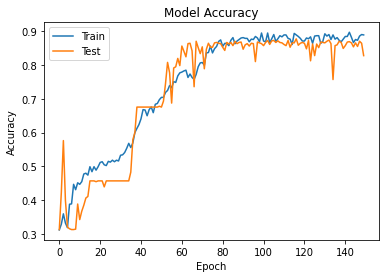

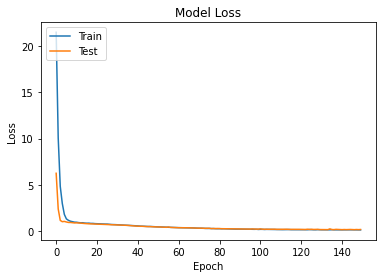

In [6]:
# Plot training & validation accuracy values
plt.plot(model_output.history['accuracy'])
plt.plot(model_output.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [7]:
precision_score(y_testComp,rounded,average=None)

array([0.84244373, 0.85314685, 0.77405858, 0.86092715, 1.        ])

In [8]:
testfile = "splicedDataML/mix6ml"
new_dataX = pd.read_csv(testfile+"X.csv",names=['s1','s2','s3','s4','s5'])
new_dataYR = np.genfromtxt(testfile+"Y.csv",delimiter=',',dtype=int)
new_dataY = keras.utils.to_categorical(new_dataYR, num_classes)
new_dataX.shape,new_dataY.shape
new_predYT = model.predict(new_dataX)
new_predY = [np.argmax(x) for x in new_predYT]
new_predYComp = [np.argmax(x) for x in new_dataY]
confusion_matrix(new_predYComp,new_predY)

array([[655,   0,   0,   2,   0],
       [  0, 214,   0,   0,   0],
       [  0,   0, 349,   0,   0],
       [  0,   0,  34, 274,   0],
       [ 73,  29,  52,  37,   6]])

In [9]:
datafile = "splicedDataML/mix6ml"

test = np.genfromtxt(datafile+"X.csv",delimiter=',')
y_dataR = np.genfromtxt(datafile+"Y.csv",delimiter=',',dtype=int)
num_classes = np.max(y_dataR) + 1
y_data = keras.utils.to_categorical(y_dataR, num_classes)
x_trainT = test[:1000]
x_testT = test[1000:]
y_trainT = y_data[:1000]
y_testT = y_data[1000:]
x_trainT.shape,y_trainT.shape,x_testT.shape,y_testT.shape, test.shape, y_data.shape



((1000, 5), (1000, 6), (725, 5), (725, 6), (1725, 5), (1725, 6))

In [10]:
x_data.shape

(1725, 5)

In [11]:
x_data = test.reshape(test.shape[0],1,5)
x_train = x_trainT.reshape(x_trainT.shape[0],1,5)
x_test = x_testT.reshape(x_testT.shape[0],1,5)
y_train = y_trainT.reshape(y_trainT.shape[0],1,6)
y_test = y_testT.reshape(y_testT.shape[0],1,6)
x_train.shape,y_train.shape,x_test.shape,y_test.shape, test.shape, y_data.shape


((1000, 1, 5), (1000, 1, 6), (725, 1, 5), (725, 1, 6), (1725, 5), (1725, 6))

In [12]:
x_data.shape

(1725, 1, 5)

In [13]:
samples = list()
length = 115
for i in range(0,x_data.shape[0],length):
	# grab from i to i + 200
	sample = x_data[i:i+length]
	samples.append(sample)
print(len(samples))

15


In [14]:
#Hidden Layer-1
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_output = model.fit(x_train, y_trainT, epochs=50, batch_size=72, validation_data=(x_test, y_testT), verbose=2, shuffle=False)

Epoch 1/50
14/14 - 0s - loss: 0.5421 - accuracy: 0.4420 - val_loss: 0.5161 - val_accuracy: 0.3641
Epoch 2/50
14/14 - 0s - loss: 0.4857 - accuracy: 0.3930 - val_loss: 0.4856 - val_accuracy: 0.3641
Epoch 3/50
14/14 - 0s - loss: 0.4540 - accuracy: 0.3930 - val_loss: 0.4652 - val_accuracy: 0.3641
Epoch 4/50
14/14 - 0s - loss: 0.4341 - accuracy: 0.3930 - val_loss: 0.4502 - val_accuracy: 0.3641
Epoch 5/50
14/14 - 0s - loss: 0.4187 - accuracy: 0.3930 - val_loss: 0.4333 - val_accuracy: 0.3641
Epoch 6/50
14/14 - 0s - loss: 0.4035 - accuracy: 0.3930 - val_loss: 0.4296 - val_accuracy: 0.3641
Epoch 7/50
14/14 - 0s - loss: 0.3978 - accuracy: 0.3930 - val_loss: 0.4255 - val_accuracy: 0.3641
Epoch 8/50
14/14 - 0s - loss: 0.3926 - accuracy: 0.3930 - val_loss: 0.4214 - val_accuracy: 0.3641
Epoch 9/50
14/14 - 0s - loss: 0.3880 - accuracy: 0.3930 - val_loss: 0.4177 - val_accuracy: 0.3641
Epoch 10/50
14/14 - 0s - loss: 0.3860 - accuracy: 0.3930 - val_loss: 0.4186 - val_accuracy: 0.3641
Epoch 11/50
14/14 -

In [15]:
model.add(LSTM(32, input_shape=(x_data.shape[1], x_data.shape[2])))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_output = model.fit(x_data, y_data, epochs=50, batch_size=72, verbose=2, shuffle=False)

ValueError: Input 0 of layer lstm_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 6]

In [ ]:
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
new_predYT= model.predict(x_train)
new_predY = [argmax(x) for x in new_predYT]
new_predYComp = [argmax(x) for x in y_train]


In [ ]:
new_predY

In [ ]:
testfile = "splicedDataML/mix6ml"
new_dataX = pd.read_csv(testfile+"X.csv",names=['s1','s2','s3','s4','s5'])
new_dataYR = np.genfromtxt(testfile+"Y.csv",delimiter=',',dtype=int)
new_dataY = keras.utils.to_categorical(new_dataYR, num_classes)
new_dataX.shape,new_dataY.shape
new_predYT = model.predict(new_dataX)
new_predY = [argmax(x) for x in new_predYT]
new_predYComp = [argmax(x) for x in new_dataY]
confusion_matrix(new_predYComp,new_predY)